In [2]:
# Common imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()


In [4]:
# Normalize the data

X_train_full = X_train_full / 255

X_test = X_test / 255

y_train_full, y_test = y_train_full.flatten(), y_test.flatten()



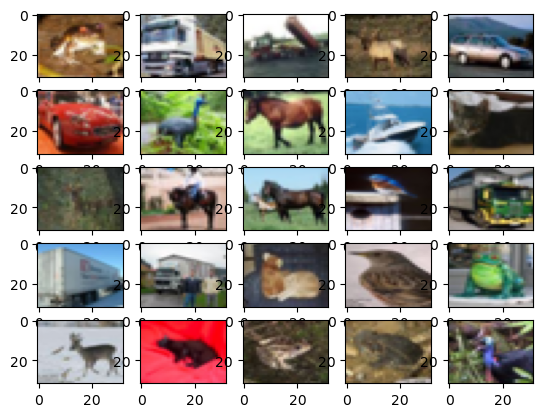

In [5]:


fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train_full[k], aspect='auto')
        k += 1

plt.show()

In [8]:
K = len(set(y_train_full))

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train_full[0].shape),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(K, activation='softmax')
])

model.summary()

c:\Users\kille\anaconda3\envs\homl3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,098 (9.14 MB)

 Trainable params: 2,396,266 (9.14 MB)

 Non-trainable params: 832 (3.25 KB)

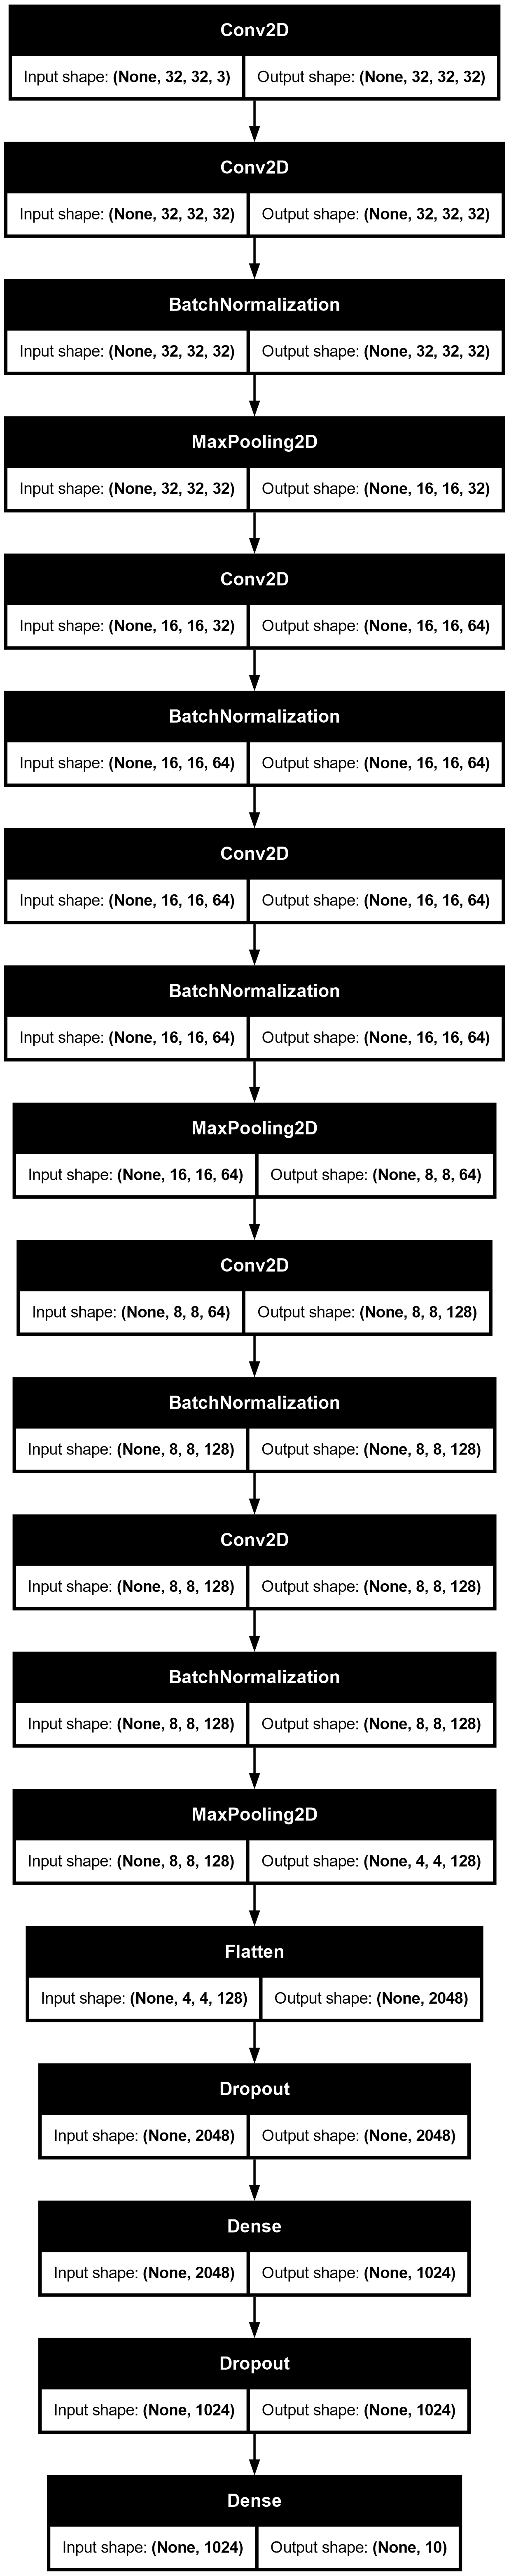

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

In [11]:
history = model.fit(X_test, y_test, epochs=20, validation_data=(X_train_full, y_train_full))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.2582 - loss: 2.5717 - val_accuracy: 0.3681 - val_loss: 1.7795
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.3826 - loss: 1.7026 - val_accuracy: 0.2477 - val_loss: 2.6254
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.4594 - loss: 1.5155 - val_accuracy: 0.3486 - val_loss: 1.9659
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.5078 - loss: 1.3504 - val_accuracy: 0.4939 - val_loss: 1.4459
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.5672 - loss: 1.1861 - val_accuracy: 0.5440 - val_loss: 1.3502
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.6418 - loss: 1.0129 - val_accuracy: 0.5409 - val_loss: 1.4037
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7036 - loss: 0.8522 - val_accuracy: 0.5126 - val_loss: 1.8028
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.7526 - loss: 0.6973 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Original label is cat and predicted label is cat


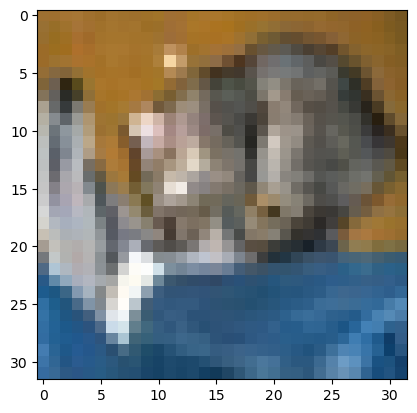

In [12]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

image_number = 0

plt.imshow(X_test[image_number])

n = np.array(X_test[image_number])

p = n.reshape(1, 32, 32, 3)


predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))